In [14]:
import sounddevice as sd
import scipy.io.wavfile
import time
import matplotlib.pyplot as plt
import numpy as np 

## Lets record a sound signal

### The following example is largely taken from https://www.chciken.com/digital/signal/processing/2020/05/13/guitar-tuner.html

In [15]:

SAMPLE_FREQ = 44100 # Sampling frequency of the recording
SAMPLE_DUR = 2  # Duration of the recoding

print("Grab your guitar! One second to recording!")
time.sleep(1) # Gives you a second to grab your guitar ;)

myRecording = sd.rec(SAMPLE_DUR * SAMPLE_FREQ, samplerate=SAMPLE_FREQ, channels=1,dtype='float64')
print("Recording audio...")
sd.wait()
print("Done!")


#myRecording = myRecording[np.round(44100*0.25).astype(int):-1].squeeze()
myRecording = myRecording.squeeze()
#scipy.io.wavfile.write('example1.wav', SAMPLE_FREQ, myRecording)

Grab your guitar! One second to recording!
Recording audio...
Done!


## Listen to what we recorded

In [27]:
sd.play(myRecording, SAMPLE_FREQ)
sd.wait()

## Visualize how it looks like

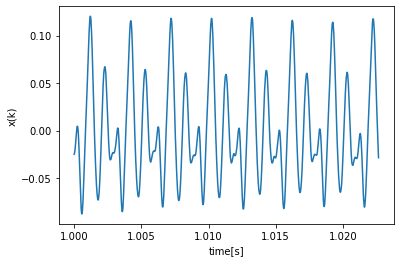

In [17]:
sampleDur = len(myRecording)/SAMPLE_FREQ 
timeX = np.arange(0,sampleDur, 1/SAMPLE_FREQ)

plt.plot(timeX[SAMPLE_FREQ:SAMPLE_FREQ+1000], myRecording[SAMPLE_FREQ:SAMPLE_FREQ+1000])
plt.ylabel('x(k)')
plt.xlabel('time[s]')
plt.show()

## Now lets visualize the FFT

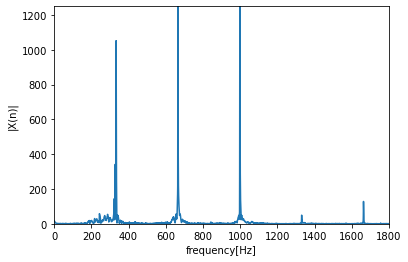

In [18]:
absFreqSpectrum = abs(np.fft.rfft(myRecording))
frequencies = np.arange(0, SAMPLE_FREQ/2, SAMPLE_FREQ/len(absFreqSpectrum)/2)
plt.plot(frequencies, absFreqSpectrum)
plt.ylabel('|X(n)|')
plt.xlabel('frequency[Hz]')
plt.axis([0, 1800, 0, 1250])
plt.show()

## Harmonic Product Spectrum (HPS) Analysis

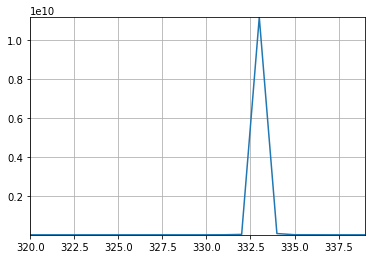

In [19]:
testFrequencies = np.arange(320,340)
nr = testFrequencies.size
test = np.ones(nr)
for i in range(nr):
    for k in range(1,5):
        coeff = np.argmin(np.abs(frequencies - k*testFrequencies[i]))
        test[i] = test[i]*absFreqSpectrum[coeff]

plt.plot(testFrequencies,test)
plt.axis([testFrequencies.min(), testFrequencies.max(), test.min(), test.max()])
plt.grid()
plt.show()

In [28]:
fac = 1
lowFr = 330*fac
upperFr = 335*fac
filteredFFT = np.fft.rfft(myRecording)* (frequencies>lowFr)*(frequencies<upperFr)
#print(filteredFFT.shape,myRecording.shape)

newRecording = np.fft.irfft(filteredFFT.squeeze())
sd.play(newRecording, SAMPLE_FREQ)
sd.wait()